<a href="https://colab.research.google.com/github/mohitpanwar26/SOC_Project/blob/main/SOC_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing necessary libraries

In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import pickle
from tensorflow import keras
from tensorflow.keras import layers

#Importing and preprocessing the data

In [2]:
folder = '/content/drive/MyDrive/train'
classes = ['Open_Eyes','Closed_Eyes']

train_data = []

for i in classes:
    path = os.path.join(folder,i)
    class_num = classes.index(i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        rgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        new_array = cv2.resize(rgb,(224,224))
        train_data.append([new_array,class_num])

In [3]:
import random
random.shuffle(train_data)
x = []
y = []

for i,j in train_data:
    x.append(i)
    y.append(j)

In [4]:
x = np.array(x).reshape(-1,224,224,3)

In [5]:
x.shape

(4010, 224, 224, 3)

In [6]:
#normalize the data
x=x/255.0

In [7]:
y= np.array(y)

In [8]:
#pickle is used for serialization
import pickle

In [9]:
pickle_out = open('x.pickle','wb')
pickle.dump(x,pickle_out)
pickle_out.close

pickle_out = open('y.pickle','wb')
pickle.dump(y,pickle_out)
pickle_out.close

<function BufferedWriter.close>

In [10]:
pickle_in= open('x.pickle','rb')
x= pickle.load(pickle_in)

pickle_in = open('y.pickle','rb')
y= pickle.load(pickle_in)

#Building the model

In [11]:
model= tf.keras.applications.mobilenet.MobileNet()

In [12]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [13]:
base_input = model.layers[0].input

In [14]:
base_output = model.layers[-4].output

In [15]:
flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(flat_layer)
final_op = layers.Activation('sigmoid')(final_output)

In [16]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [17]:
new_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics= ['accuracy'])

In [18]:
new_model.fit(x,y,epochs=2, validation_split=0.1)

Epoch 1/2
113/113 [==============================] - 810s 7s/step - loss: 0.4263 - accuracy: 0.9695 - val_loss: 2.8243 - val_accuracy: 0.8105
Epoch 2/2
113/113 [==============================] - 799s 7s/step - loss: 0.0346 - accuracy: 0.9975 - val_loss: 0.0493 - val_accuracy: 0.9925


In [19]:
new_model.save('my_model.h17')

In [20]:
new_model = tf.keras.models.load_model('my_model.h17')

#Checking network for predictions on eye images

In [22]:
img = cv2.imread('/content/drive/MyDrive/Some Images to test/open-test_1.png',cv2.IMREAD_GRAYSCALE)
rgb = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
new = cv2.resize(rgb,(224,224))

In [23]:
x_input = np.array(new).reshape(1,224,224,3)

In [24]:
x_input.shape

(1, 224, 224, 3)

In [25]:
x_input = x_input/255.0

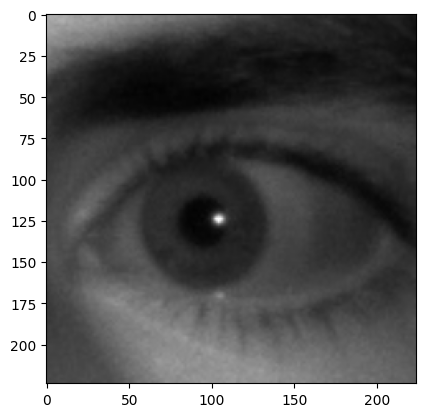

In [26]:
plt.imshow(new)

In [27]:
prediction = new_model.predict(x_input)

1/1 [==============================] - 1s 939ms/step


In [28]:
prediction

array([[-28.751171]], dtype=float32)

#Detecting eyes from face and deploying model on it for prediction

1/1 [==============================] - 0s 68ms/step


array([[-35.240555]], dtype=float32)

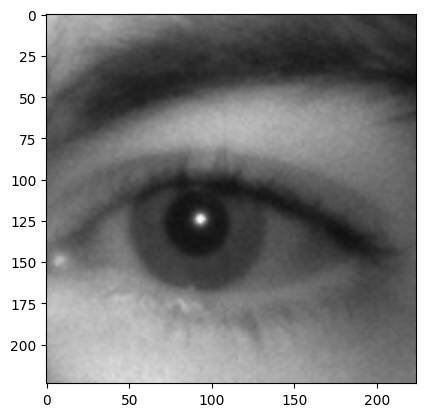

In [29]:
img = cv2.imread('/content/drive/MyDrive/Some Images to test/open-test_2.png',cv2.IMREAD_GRAYSCALE)
rgb = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
new = cv2.resize(rgb,(224,224))
x_input = np.array(new).reshape(1,224,224,3)
x_input.shape
x_input = x_input/255.0
plt.imshow(new)
prediction = new_model.predict(x_input)
prediction

1/1 [==============================] - 0s 104ms/step


array([[-13.897303]], dtype=float32)

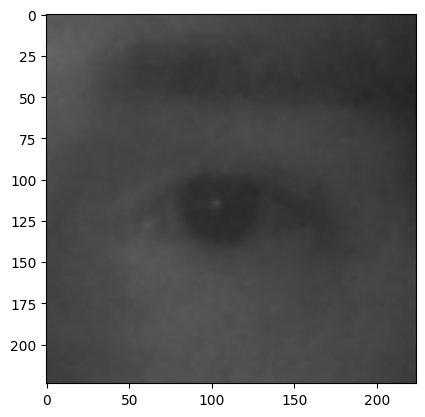

In [30]:
img = cv2.imread('/content/drive/MyDrive/Some Images to test/open-test_3.png',cv2.IMREAD_GRAYSCALE)
rgb = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
new = cv2.resize(rgb,(224,224))
x_input = np.array(new).reshape(1,224,224,3)
x_input.shape
x_input = x_input/255.0
plt.imshow(new)
prediction = new_model.predict(x_input)
prediction

1/1 [==============================] - 0s 69ms/step


array([[7.1276712]], dtype=float32)

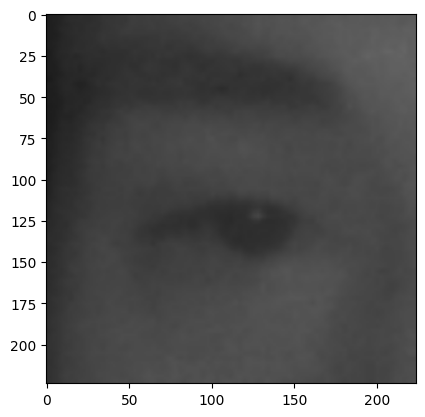

In [31]:
img = cv2.imread('/content/drive/MyDrive/Some Images to test/open-test_4.png',cv2.IMREAD_GRAYSCALE)
rgb = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
new = cv2.resize(rgb,(224,224))
x_input = np.array(new).reshape(1,224,224,3)
x_input.shape
x_input = x_input/255.0
plt.imshow(new)
prediction = new_model.predict(x_input)
prediction

1/1 [==============================] - 0s 67ms/step


array([[16.678938]], dtype=float32)

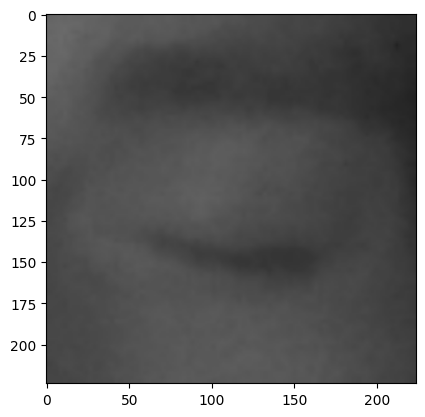

In [32]:
img = cv2.imread('/content/drive/MyDrive/Some Images to test/closed_test_1.png',cv2.IMREAD_GRAYSCALE)
rgb = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
new = cv2.resize(rgb,(224,224))
x_input = np.array(new).reshape(1,224,224,3)
x_input.shape
x_input = x_input/255.0
plt.imshow(new)
prediction = new_model.predict(x_input)
prediction

1/1 [==============================] - 0s 73ms/step


array([[17.884932]], dtype=float32)

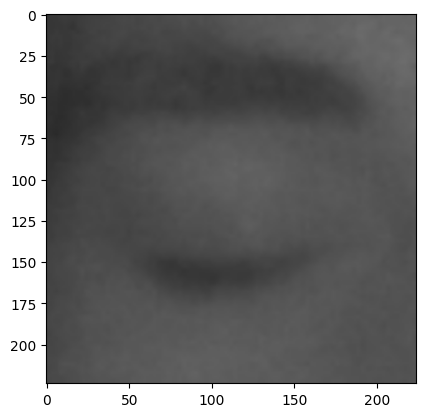

In [33]:
img = cv2.imread('/content/drive/MyDrive/Some Images to test/closed_test_2.png',cv2.IMREAD_GRAYSCALE)
rgb = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
new = cv2.resize(rgb,(224,224))
x_input = np.array(new).reshape(1,224,224,3)
x_input.shape
x_input = x_input/255.0
plt.imshow(new)
prediction = new_model.predict(x_input)
prediction

1/1 [==============================] - 0s 71ms/step


array([[17.674505]], dtype=float32)

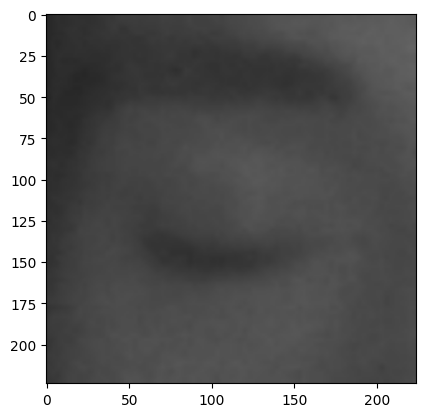

In [34]:
img = cv2.imread('/content/drive/MyDrive/Some Images to test/closed_test_3.png',cv2.IMREAD_GRAYSCALE)
rgb = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
new = cv2.resize(rgb,(224,224))
x_input = np.array(new).reshape(1,224,224,3)
x_input.shape
x_input = x_input/255.0
plt.imshow(new)
prediction = new_model.predict(x_input)
prediction

1/1 [==============================] - 0s 61ms/step


array([[17.932161]], dtype=float32)

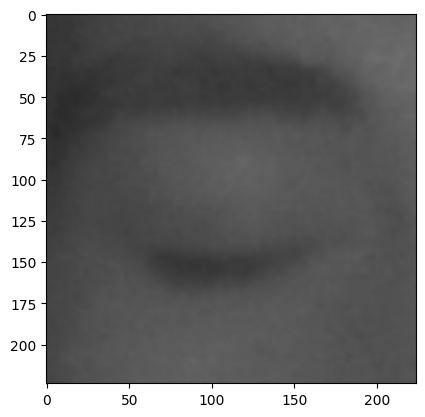

In [35]:
img = cv2.imread('/content/drive/MyDrive/Some Images to test/closed_test_4.png',cv2.IMREAD_GRAYSCALE)
rgb = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
new = cv2.resize(rgb,(224,224))
x_input = np.array(new).reshape(1,224,224,3)
x_input.shape
x_input = x_input/255.0
plt.imshow(new)
prediction = new_model.predict(x_input)
prediction

#For full face

In [36]:
img = cv2.imread('/content/drive/MyDrive/Some Images to test/full_face.jpg')

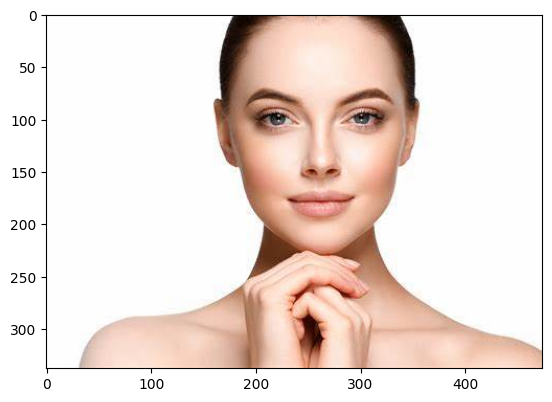

In [37]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [38]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_defaut.xml')

In [39]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [40]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [42]:
eyes = eye_cascade.detectMultiScale(gray,1.1,4)

In [43]:
for x,y,w,h in eyes[:2]:
  cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

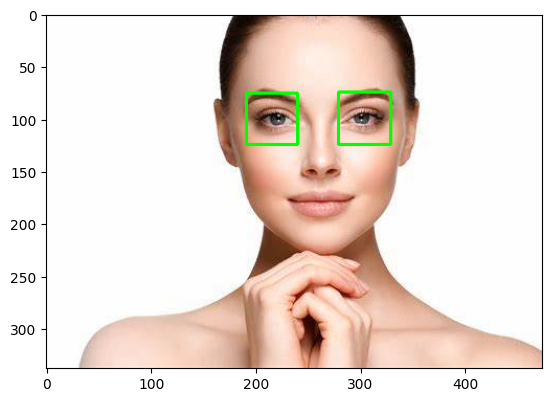

In [44]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [45]:
#cropping eyes
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
eyes = eye_cascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in eyes[:2]:
  roi_gray = gray[y:y+h,x:x+w]
  roi_color = img[y:y+h,x:x+w]
  eyess = eye_cascade.detectMultiScale(roi_gray)
  if len(eyess)==0:
    print('eyes are not detected')
  else:
    for(ex,ey,ew,eh) in eyess:
      eyes_roi = roi_color[ey:ey+eh,ex:ex+ew]

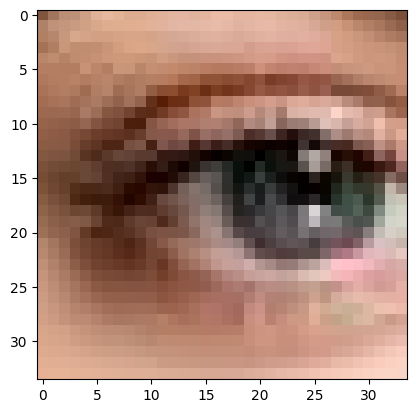

In [46]:
plt.imshow(cv2.cvtColor(eyes_roi,cv2.COLOR_BGR2RGB))

In [47]:
final_image = cv2.resize(eyes_roi,(224,224))
final_image = np.expand_dims(final_image,axis=0)
final_image = final_image/255.0

In [48]:
final_image.shape

(1, 224, 224, 3)

In [49]:
predictions = new_model.predict(final_image)

1/1 [==============================] - 0s 95ms/step


In [50]:
predictions

array([[-27.063473]], dtype=float32)